# **Assignment 2 Data Exploration**

## **Xingxiang Huang**

In this assignment, I checked the data types and basic characteristics of LA Metro Bike Share trip data. Major steps included checking dataset dimensions, visualizing trip durations, and analyzing passholder types. I also filtered trips longer than 10 minutes to identify patterns in extended usage.

### Import Required Libraries and Load Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = 'metro-trips-2024-q1.csv'
bike_data = pd.read_csv(file_path)


### Use `.shape` to Check Dimensions

In [2]:
print("Dataset dimensions:", bike_data.shape)

Dataset dimensions: (119849, 15)


### Use `.info()` to View Summary

In [3]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119849 entries, 0 to 119848
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   trip_id              119849 non-null  int64  
 1   duration             119849 non-null  int64  
 2   start_time           119849 non-null  object 
 3   end_time             119849 non-null  object 
 4   start_station        119849 non-null  int64  
 5   start_lat            119840 non-null  float64
 6   start_lon            119840 non-null  float64
 7   end_station          119849 non-null  int64  
 8   end_lat              117663 non-null  float64
 9   end_lon              117663 non-null  float64
 10  bike_id              119849 non-null  int64  
 11  plan_duration        119849 non-null  int64  
 12  trip_route_category  119849 non-null  object 
 13  passholder_type      119849 non-null  object 
 14  bike_type            119849 non-null  object 
dtypes: float64(4), in

### Use `.head()` to Display the First Few Rows

In [4]:
bike_data.head()

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type
0,341828178,87,1/1/2024 0:10,1/1/2024 1:37,4515,34.039742,-118.442268,4564,34.035351,-118.434143,24169,30,One Way,Monthly Pass,electric
1,341816845,6,1/1/2024 0:12,1/1/2024 0:18,4602,34.164951,-118.363632,4603,34.152142,-118.361954,15430,1,One Way,Walk-up,standard
2,341817147,20,1/1/2024 0:15,1/1/2024 0:35,3064,34.046131,-118.257591,3081,34.031891,-118.250183,5913,30,One Way,Monthly Pass,standard
3,341817198,16,1/1/2024 0:22,1/1/2024 0:38,4543,33.957180,-118.451248,4583,33.976189,-118.418419,6132,1,One Way,Walk-up,standard
4,341816990,5,1/1/2024 0:23,1/1/2024 0:28,4518,34.057968,-118.299751,4587,34.060791,-118.309067,29601,365,One Way,Annual Pass,electric


### Create a Frequency Histogram of trip durations with `.plot()`

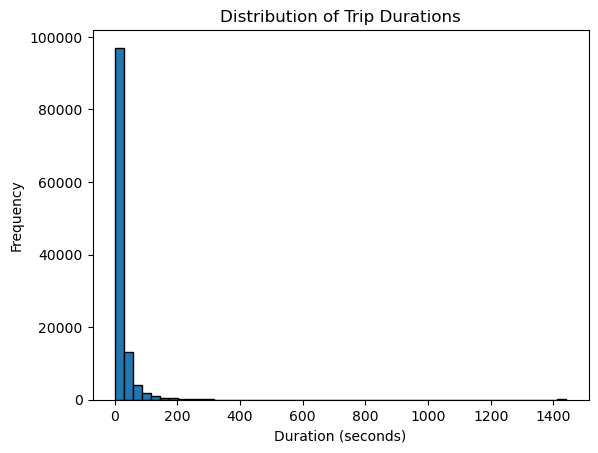

In [5]:
plt.hist(bike_data['duration'], bins=50, edgecolor='black')
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

### Use `.value_counts()` for Category Analysis

passholder_type
Monthly Pass    80532
Walk-up         19082
Annual Pass     12092
One Day Pass     8143
Name: count, dtype: int64


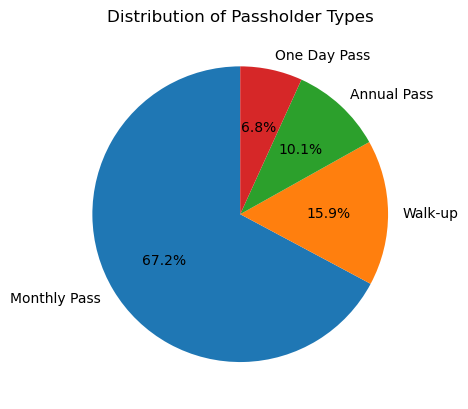

In [6]:
user_type_counts = bike_data['passholder_type'].value_counts()
print(user_type_counts)

# Plot a pie chart for passholder types
user_type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Passholder Types')
plt.ylabel('')
plt.show()


### Run a Query to Filter Data

Filter Trips Longer than 10 Minutes(>600 seconds)

In [7]:
long_trips = bike_data[bike_data['duration'] > 600]
print("Number of trips longer than 10 minutes:", long_trips.shape[0])

# Display the first few rows of the filtered data
long_trips.head()

Number of trips longer than 10 minutes: 558


,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type
46,342192543,1440,1/1/2024 1:48,1/2/2024 9:10,3027,34.049980,-118.247162,3000,NaN,NaN,22219,1,One Way,Walk-up,electric
73,342053085,858,1/1/2024 3:20,1/1/2024 17:38,4483,34.100700,-118.259117,4455,34.109360,-118.271812,20120,1,One Way,One Day Pass,standard
185,342255606,1440,1/1/2024 10:45,1/2/2024 14:15,4566,34.023392,-118.399223,4558,34.025688,-118.395302,21930,1,One Way,Walk-up,electric
203,342488299,1440,1/1/2024 11:05,1/3/2024 9:56,4544,33.928459,-118.435204,3000,NaN,NaN,24843,1,One Way,Walk-up,electric
331,342138627,833,1/1/2024 12:29,1/2/2024 2:22,4214,33.995560,-118.481552,4214,33.995560,-118.481552,13874,1,Round Trip,Walk-up,standard


### Plot the Bike Trip Start Locations with points

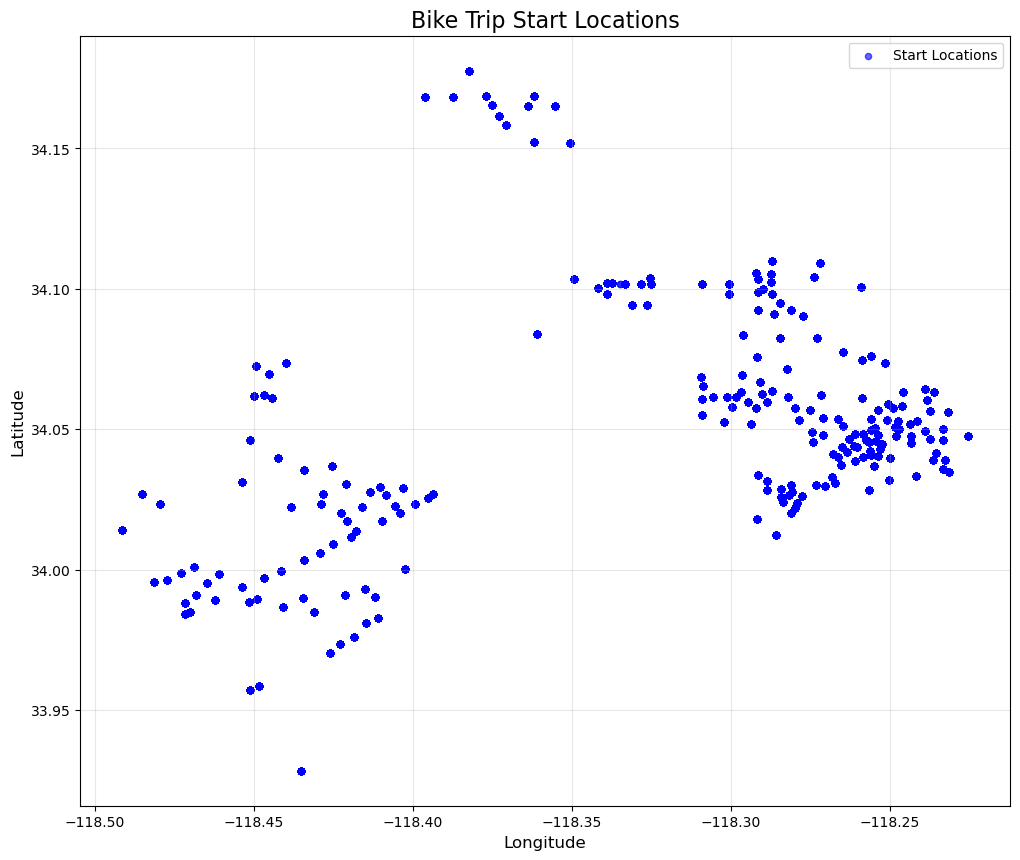

In [8]:
# Plot the start locations
plt.figure(figsize=(12, 10))

# Plot start locations
plt.scatter(bike_data['start_lon'], bike_data['start_lat'], s=20, color='blue', alpha=0.6, label='Start Locations')

# Add labels, legend, and grid
plt.title('Bike Trip Start Locations', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

